In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import linear_model

%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [ ]:
ground_cricket_data = {"Chirps_per_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [ ]:
# 1. Find the linear regression equation for this data.

# input_data = np.array(df[['Ground Temperature']])
input_data = df[['Ground Temperature']]
output_data = df['Chirps_per_Second']

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(input_data, output_data)   # Train the model using the training sets
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

In [ ]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regr.predict(input_data), color='blue', linewidth=3)
plt.title('Effect of Temperature on Cricket Chirp Rate', )
plt.xlabel('Ground Temperature in Degrees F')
plt.ylabel('Number of Chirps per Second')
plt.show()

In [ ]:
def chirps_at_temp(degree):
    return degree * regr.coef_ + regr.intercept_
chirps_at_temp(95)

In [ ]:
# def temp_by_chirps(rate):
#     return                         *****  STILL NEED TO DO THIS ONE !!  ******

In [ ]:
''' Extrapolate data: If the ground temperature reached 95° F, then at what 
    approximate rate would you expect the crickets to be chirping?  
    
    Interpolate data: With a listening device, you discovered that 
    on a particular morning the crickets were chirping at a rate 
    of 18 chirps per second. What was the approximate ground temperature 
    that morning?
'''

#### It has been observed that crickets do not sing at a ground temperature of 100° F, therefore, it is possible that their rate of chirping would begin to decrease as the temperature approaches 100° F.  
#### However, if they are not yet feeling any effect from the temperature approaching 100° F, a visual inspection of the chart leads me to _extrapolate_ that at a temperature of 95° F, the crickets would chirp at a rate of just under 20 chirps per second.  My formula above supports this estimate, with an extrapolation of 19.75 chirps per second at a temperature of 95° F.

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df2 = pd.read_fwf("brain_body.txt")

In [ ]:
'''Find the linear regression equation for this data for brain weight to body weight.'''
df2.head()

In [ ]:
input_data = np.array(df2[['Brain']])
output_data = df2['Body']

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(input_data, output_data)   
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

In [ ]:
plt.scatter(input_data, output_data)
plt.plot(input_data, regr.predict(input_data), color='red', linewidth=1)
plt.title('Relationship of Body Weight to Brain Weight\n in Mammals', )
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [4]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [7]:
'''Find the linear regression equation for this data using columns 1-5 to column 6.'''

df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


##### Linear Regression for Gender to Salary

With an $R^2$ score of .06, there appears to be no relationship between salary and gender.

In [29]:
input_data = np.array(df3[['Sex']])
output_data = df3['Salary']

regr = linear_model.LinearRegression()   
regr.fit(input_data, output_data)   
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[-3339.64661654] 24696.7894737
0.0638989258329


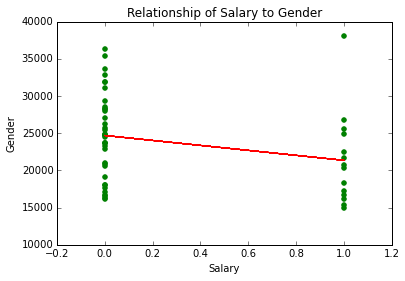

In [30]:
plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr.predict(input_data), color='red', linewidth=1)
plt.title('Relationship of Salary to Gender', )
plt.xlabel('Salary')
plt.ylabel('Gender')
plt.show()

##### Linear Regression for Rank to Salary

With an $R^2$ score of .75, there appears to be someo relationship between salary and rank.

In [31]:
input_data = np.array(df3[['Salary']])
output_data = df3['Rank']

regr = linear_model.LinearRegression()   
regr.fit(input_data, output_data)   
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[ 0.00012642] -0.969980872205
0.752536053927


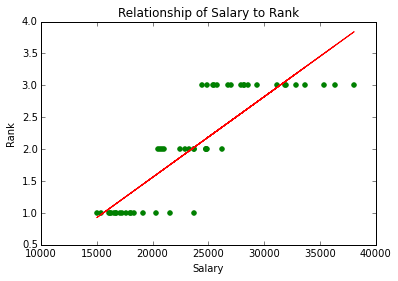

In [32]:
plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr.predict(input_data), color='red', linewidth=1)
plt.title('Relationship of Salary to Rank', )
plt.xlabel('Salary')
plt.ylabel('Rank')
plt.show()

##### Linear Regression for Year to Salary

With an $R^2$ score of .49, there appears to be no significant relationship between salary and number of years in current rank.

In [33]:
input_data = np.array(df3[['Year']])
output_data = df3['Salary']

regr = linear_model.LinearRegression()   
regr.fit(input_data, output_data)   
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[ 752.79775742] 18166.1475455
0.490937026769


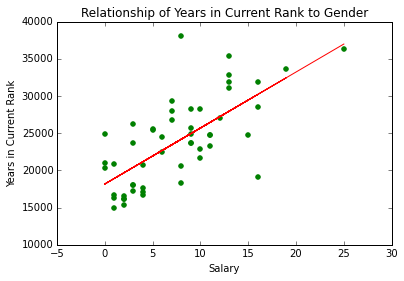

In [34]:
plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr.predict(input_data), color='red', linewidth=1)
plt.title('Relationship of Years in Current Rank to Gender', )
plt.xlabel('Salary')
plt.ylabel('Years in Current Rank')
plt.show()

##### Linear Regression for Highest Degree to Salary

With an $R^2$ score of .004, there appears to be no relationship between salary and highest degree earned.

In [35]:
input_data = np.array(df3[['Degree']])
output_data = df3['Salary']

regr = linear_model.LinearRegression()   
regr.fit(input_data, output_data)   
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[-858.86928105] 24359.2222222
0.00486168098475


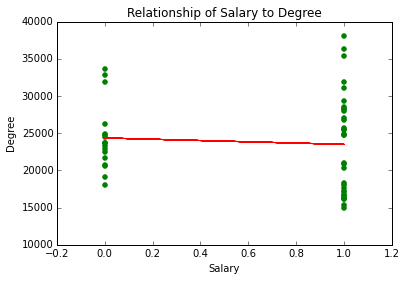

In [36]:
plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr.predict(input_data), color='red', linewidth=1)
plt.title('Relationship of Salary to Degree', )
plt.xlabel('Salary')
plt.ylabel('Degree')
plt.show()

##### Linear Regression for Number of Years Since Degree to Salary

With an $R^2$ score of .46, there appears to be no significant relationship between salary and number of years since the highest degree was earned.

In [37]:
input_data = np.array(df3[['YSdeg']])
output_data = df3['Salary']

regr = linear_model.LinearRegression()   
regr.fit(input_data, output_data)   
print(regr.coef_, regr.intercept_)
print(regr.score(input_data, output_data))

[ 390.64512637] 17502.2573866
0.455428134584


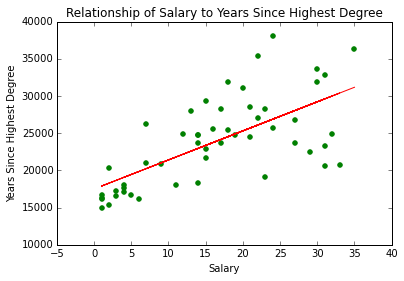

In [38]:
plt.scatter(input_data, output_data, color='green')
plt.plot(input_data, regr.predict(input_data), color='red', linewidth=1)
plt.title('Relationship of Salary to Years Since Highest Degree', )
plt.xlabel('Salary')
plt.ylabel('Years Since Highest Degree')
plt.show()

### Searching for Columns with the Best $R^2$ Score

In order to find out which of the various criteria which go into the determination of salary has the highest $R^2$ score, I will run all the possible combinations of criteria through a regression and store the results.

In [54]:
poss_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
combos = []
regr_scores = []
for x in range(2,6):
    combos.append(list(itertools.combinations(poss_cols, x)))
# print(combos)

for a in combos:
    for b in a:
#        print(b)
        input_data = df3[list(b)]
        output_data = df3['Sex']
        regr = linear_model.LinearRegression()   
        regr_scores.append(regr.fit(input_data, output_data))

print(regr_scores)
regr_scores[4].coef_

    
    

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, nor

array([-0.02637836, -0.02875615])